## Particle size and Growth estimates from Marsh 1998 ##

In Marsh the total number of particles is

$$ N_0 = C_N \left(  \frac{J_0}{G_0} \right)^{3/4} ,$$

where $J_0$ (m$^{-3}$ s$^{-1}$) and $G_0$ (m~s$^{-1}$) are the characteristic rates of nucleation and growth. The typical crystal size is

$$ L_0 = C_L \left(  \frac{G_0}{J_0} \right)^{1/4} .$$

Marsh's Table 1 gives $0.8 < C_N < 61$ and $0.1 < C_L <0.7$. As a first pass we can take these values. 

Marsh defined $J_0$ and $G_0$ such that

$$J(t) = J_0 \exp\left({\frac{at}{t_c}}\right), \quad G(t) = G_0 \exp\left({\frac{bt}{t_c}}\right)$$

Marsh 1988 also gives analytical solutions for the CSD $n$ in simple situations. I consider the case where the volume $V$ of the system is constant and the system is "flushed" on a (constant) timescale $\tau_s$ (the Stokes timescale). In this case the solution is 

$$ n = \frac{J_0}{G_0} \exp{(-L/G_0\tau)} .$$

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

import params
import nucleation_and_growth as nandg
import falling


Pr =  0.09075  Sc =  999.9999999999999


In [2]:
r = np.logspace(-8,3,num=100)     # Array of particle sizes in metres

In [3]:
tVh, _, _, _, _, _, _ = falling.calculate_boundary_layers(r, 
                params.mu, params.g, params.drho, params.rhol, params.kappa,
                params.Dliq, params.rf, params.ri)

In [4]:
NT  = 11
G0  = np.zeros(NT)
J0  = np.zeros(NT)
intn= np.zeros([NT,len(r)])
nn  = np.zeros([NT,len(r)])
nn2 = np.zeros([NT,len(r)])
dT  = np.linspace(500,900,NT)
G1  = 1e-2

kk = 0
for k in dT:
    G0[kk] = nandg.sun_velocity_fit(k, params.Tm, params.cu_dhm, params.cu_k0)
    J0[kk] = 1.0/nandg.tauv(k, params.Tm)
    
    n0 = J0[kk]/G0[kk]
    ii = 0
    for i in r:
        nn[kk,ii]  = n0 * np.exp(-i/(G0[kk]*tVh[ii]*params.secinyr)) 
        nn2[kk,ii] = n0 * np.exp(-i/(G1    *tVh[ii]*params.secinyr)) 
        ii  = ii + 1
        
    intn[kk,:] = scipy.integrate.cumtrapz(nn[kk,:],r,initial=0)
        
    kk = kk + 1

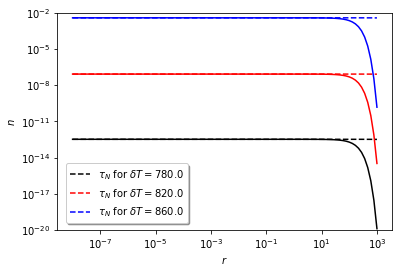

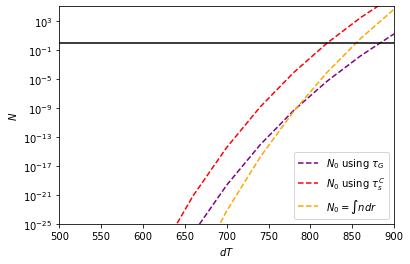

In [5]:
tmp = 1e30*np.ones(len(dT))
tmp2= 1e-7*np.ones(len(dT))

fig, ax = plt.subplots()
ax.set_xlabel("$r$")
ax.set_ylabel("$n$")
ax.set_ylim([1e-20,1e-2])
ax.loglog(r, nn[7,:], color="black", linestyle="--",label="$\\tau_N$ for $\delta T = $"+str(dT[7]))
ax.loglog(r, nn[8,:], color="red"  , linestyle="--",label="$\\tau_N$ for $\delta T = $"+str(dT[8]))
ax.loglog(r, nn[9,:], color="blue" , linestyle="--",label="$\\tau_N$ for $\delta T = $"+str(dT[9]))
ax.loglog(r, nn2[7,:], color="black", linestyle="-")
ax.loglog(r, nn2[8,:], color="red"  , linestyle="-")
ax.loglog(r, nn2[9,:], color="blue" , linestyle="-")
ax.legend(loc='lower left', bbox_to_anchor=(0.01, 0.01),
          fancybox=True, shadow=True)
file2="CSD.pdf"
plt.savefig(file2, format='pdf',bbox_inches="tight")

# Growth rate based on chemical diffusion
G0c = params.Dsol/1e-6
tmp3 = np.ones(len(dT))

fig, ax = plt.subplots()
ax.set_xlabel("$dT$")
ax.set_ylabel("$N$")
ax.set_yscale('log')
ax.set_xlim([500,900])
ax.set_ylim([1e-25,1e5])
ax.plot(dT, (J0/G0)**0.75 , color="purple" , linestyle="--",label="$N_0$ using $\\tau_G$")
ax.plot(dT, (J0/G0c)**0.75, color="red"    , linestyle="--",label="$N_0$ using $\\tau_s^C$")
ax.plot(dT, intn[:,-1]    , color="orange" , linestyle="--",label="$N_0 = \int n dr$")
ax.plot(dT,tmp3,color="black") 
ax.legend(loc=4)
file2="N0.pdf"
plt.savefig(file2, format='pdf',bbox_inches="tight")